<img src="http://www.exalumnos.usm.cl/wp-content/uploads/2015/06/Isotipo-Negro.gif" title="Title text" width="20%" height="20%" />


<hr style="height:2px;border:none"/>
<h1 align='center'> INF-393 M√°quinas de Aprendizaje II-2019 </h1>

<H3 align='center'> Tarea 3 - Ensamblados y modelos avanzados </H3>
<hr style="height:2px;border:none"/>

**Temas**  
* T√©cnicas de ensamblado: *bagging*, *boosting* y *random forest*.
* Ventajas de t√©cnicas de ensamblados
* Problemas desbalanceados
 

**Formalidades**  
* Equipos de trabajo de: 2 personas (*cada uno debe estar en condiciones de realizar una presentaci√≥n y discutir sobre cada punto del trabajo realizado*)
* Se debe preparar una presentaci√≥n de 20 minutos. Presentador ser√° elegido aleatoriamente.
* Se debe preparar un (breve) Jupyter/IPython notebook que explique la actividad realizada y las conclusiones del trabajo
* Fecha de entrega y cierre competencia: 17 de Enero
* Formato de entrega: envƒ±ÃÅo de link Github al correo electr√≥nico del ayudante (*<francisco.mena.13@sansano.usm.cl>*) , incluyendo al profesor en copia (*<jnancu@inf.utfsm.cl>*). Por favor especificar el siguiente asunto: [Tarea3-INF393-II-2019]

<hr style="height:2px;border:none"/>


[1.](#primero) Ensamblados para regresi√≥n  

<a id="primero"></a>
## 1. Ensamblados para regresi√≥n
---
Las t√©cnicas de ensamblados vistos en clases pueden ser aplicadas tanto a problemas de clasificaci√≥n o regresi√≥n, teniendo la ventaja de utilizar m√∫ltiples modelos de aprendizaje para utilizar la ventaja de cada uno. En este actividad se trabajar√° con predecir la temperatura media de un d√≠a, dada cierta informaci√≥n del d√≠a anterior, como la humedad, velocidad del viento, presi√≥n atmosf√©rica, fecha y temperatura. El modelo predictor derivado puede ser bastante √∫til para conocer el comportamiento del clima a lo largo del tiempo.

<img src="https://scijinks.gov/review/forecast-reliability/forecast-reliability2.jpg" title="Title text" width="70%"  />

Los datos de clima son recolectados en la ciudad Delhi de India por un per√≠odo de 4 a√±os (2013 a 2017), proporcionados en Kaggle a trav√©s del siguiente __[link](https://www.kaggle.com/sumanthvrao/daily-climate-time-series-data)__, las particiones de entrenamiento y prueba est√°n dadas. El registro de cada dato corresponde a un d√≠a, incrementando a trav√©s de las filas por cada d√≠a.

---
    
>  Cargue los datos en un dataframe de pandas, adem√°s agregue una columna indicando el valor a predecir, la temperatura media del d√≠a siguiente. *Como el √∫ltimo dato/registro no tiene un valor a predecir √©ste se elimina*.
```python
import pandas as pd
df = pd.read_csv("DailyDelhiClimateTrain.csv")
df["y_value"] = df["meantemp"].shift(-1)
df = df.iloc[:-1] #remove last row
```

> Debido a la poca informaci√≥n que se tiene a trav√©s de los 4 par√°metros medidos, extra√≠ga m√°s informaci√≥n a trav√©s de los datos de fecha. Por ejemplo, el comportamiento a trav√©s de los meses y a√±os var√≠a, as√≠ como la informaci√≥n de la temporada del a√±o podr√≠a ayudar a la predicci√≥n. Decida si puede incluir m√°s informaci√≥n a partir de la fecha que tenga sentido con el problema.
```python
...#procesamiento de fecha(datetime/timestamp) a numeros
df["date"] = pd.to_datetime(df["date"])
df['cday'] = df['date'].dt.dayofweek #0:lunes,6:domingo
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month #1:enero, 12: diciembre
...#based on: https://en.wikipedia.org/wiki/Climate_of_India
seasons = ["winter","winter","summer","summer","summer","rainy","rainy","rainy","fall","fall","fall","winter"]
df['season'] = [ seasons[month_i - 1] for month_i in df['month'].values ]
df = pd.get_dummies(df,columns=['season']) #to one hot.. as nominal variable
... #any more information?
df.drop(["date"], axis=1, inplace=True) #delete date
```

> Cree las matrices de entrenamiento, con los mil primeros registros, y de validaci√≥n, con el resto. Para evitar el orden natural en que vienen los datos entrenados, realice un *shuffle* aleatorio.
```python
y = df.pop("y_value").values
X = df.values 
X_train = X[:1000]
y_train = y[:1000]
X_val = X[1000:]
y_val = y[1000:]
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train, random_state=0) #shuffle values on train only
```

> a) Describa el problema trabajado, la cantida de datos que se cuenta como las caracter√≠sticas a trabajar. Al ser datos temporales podr√≠a ayudar una ilustraci√≥n gr√°fica de la secuencias trabajadas y su comportamiento ¬øEs v√°lido el uso de la informaci√≥n s√≥lo del d√≠a anterior?.


> b) Entrene un solo √Årbol de Regresi√≥n de m√∫ltiples niveles para resolver el problema. Defina un √Årbol **no regularizado** (como el que no tiene l√≠mites en su profundidad) y otro √Årbol **regularizado** (variando los hiper-par√°metros que prefiera, por ejemplo, los m√°s comunes como la profundidad, el n√∫mero m√≠nimo de datos para realizar *split* o el n√∫mero m√≠nimo de datos en cada hoja). Adem√°s comente sobre la ventaja de usar un √°rbol de decisi√≥n respecto a la escala de los datos ¬øPorqu√© no es necesario escalar los datos?
```python
import numpy as np
def RMSE(ytrue,ypred):
    return np.sqrt(np.mean(np.square(ytrue - ypred)) )
from sklearn.tree import DecisionTreeRegressor as Tree
model_unr = Tree() #unregularized model -- default parameters
model_unr.fit(X_train,y_train)
... #define your regularized tree model
``` 

> c) Para evaluar la calidad de predicci√≥n en este problema se utilizar√° la m√©trica *Root Mean Squared Error* (RMSE), indicando un error en la escala real de la temperatura. Como los datos de validaci√≥n siguen con el orden temporal, visualice esa predicci√≥n a lo largo del tiempo. Comente sobre los resultados comparando la regularizaci√≥n *vs* el no regularizar.
```python
y_train_hat = model.predict(X_train)
y_val_hat = model.predict(X_val)
print("RMSE train= ",RMSE(y_train,y_train_hat))
print("RMSE val= ",RMSE(y_val,y_val_hat))
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
plt.plot(y_val, '.-' ,label="True values")
plt.plot(y_val_hat, '.-' ,label="Pred values")
plt.legend()
plt.show()
```
    
> d) Entrene un ensamblado de √°rboles de m√∫ltiples niveles, mediante la t√©cnica de **Bagging**, compare el √Årbol **no regularizado** con el **regularizado** (*seteando los hiper-par√°metros en base a lo experimentado anteriormente en b)*) ¬øQu√© deber√≠a suceder? ¬øSe visualiza *overfitting*? Var√≠e la cantidad de √°rboles de decisi√≥n utilizados en el ensamblado (*n estimators*), realice un gr√°fico resumen del RMSE de entrenamiento y validaci√≥n en funci√≥n de este hiper-par√°metro.
```python
from sklearn.ensemble import BaggingRegressor
model = BaggingRegressor(base_estimator=Tree(...), n_estimators=..., n_jobs=-1)
```

> e) Entrene un ensamblado de √°rboles de m√∫ltiples niveles, mediante la t√©cnica de **AdaBoost**, compare el √Årbol **no regularizado** con el **regularizado** (*seteando los hiper-par√°metros en base a lo experimentado anteriormente en d)* ¬øSe visualiza *overfitting*? ¬øQu√© t√©cnica utiliza la librer√≠a de sklearn, *re-muestrear* o *pesar* ejemplos? ¬øQu√© le parece m√°s sensato?. Var√≠e la cantidad de √°rboles de decisi√≥n utilizados en el ensamblado (*n estimators*), realice un gr√°fico resumen del RMSE de entrenamiento y validaci√≥n en funci√≥n de este hiper-par√°metro. Compare y analice con la t√©cnica utilizada en d).
```python
from sklearn.ensemble import AdaBoostRegressor
model = AdaBoostRegressor(base_estimator=Tree(...), n_estimators=...)
```

> f) Pruebe otra t√©cnica de ensamblado dedicada a √°rboles de decisi√≥n, que combina el muestreo *boostrap* de *Bagging* con muestreo sobre las *features*: **Random Forest**, compare el √Årbol **no regularizado** con el **regularizado** ¬øSe visualiza *overfitting*?. Var√≠e la cantidad de √°rboles de decisi√≥n utilizados en el ensamblado (*n estimators*), realice un gr√°fico resumen del RMSE de entrenamiento y validaci√≥n en funci√≥n de este hiper-par√°metro.
```python
from sklearn.ensemble import RandomForestRegressor
model_unr = RandomForestRegressor(n_estimators=..., n_jobs=-1)
... #define your regularized random forest model
```

> g) Verifique que el **OOB error** (*out of bag error*) de los ensambladores que utilizan la t√©cnica *boostrap* puede ser una alternativa como m√©trica de generalizaci√≥n, compare con el error calculado sobre el conjunto de validaci√≥n (o en su defecto *cross validation*).
```python
oob_error = model.oob_score_
val_error = model.score(X_val,y_val)
print("OOB error: ",oob_error)
print ("Val error: ",val_error)
```

> h) Defina otra forma de combinar los valores que entregan los ensamblados al hacer predicciones y compare con lo que se hace actualmente, por ejemplo *Bagging* realiza el voto de la mayor√≠a para clasificaci√≥n y promedio para regresi√≥n, *AdaBoost* realiza una combinaci√≥n ponderada de cada clasificador dependiendo de su *habilidad* (desempe√±o para clasificar el conjunto de entrenamiento). Se puede inspirar desde cl√°sicos estad√≠sticos, como entregar el primer cuart√≠l ($Q_1$) si al ensamblado le cuesta predecir valores bajos, o el segundo cuartil ($Q_2$) o mediana para ser robusto a predicciones at√≠picas de modelos.  
```python
def combine_predictions(predictions):
    return #define !
list_estimators = model.estimators_
list_predictions = [estimator.predict(X_val) for estimator in list_estimators]
new_predictions = combine_predictions(list_predictions)
print("RMSE val= ",RMSE(y_val, new_predictions))
```

> i) Si se cuenta con una gran cantidad de modelos en el ensamblado, por ejemplo $T>100$, se puede crear un intervalo de confianza de la predicci√≥n a trav√©s de todos estos valores, asumiendo una distribuci√≥n Normal centrada en la media muestral de las predicciones, con desviaci√≥n est√°ndar muestral en las predicciones. El intervalo de confianza entrega m√°s informaci√≥n que un √∫nico valor puntual de predicci√≥n. Visualice un intervalo de confianza al 95% de probabilidad en la predicci√≥n a lo largo de la serie de tiempo de validaci√≥n, comente. Al asumir una distribuci√≥n Normal, tambi√©n puede explorar el tomar como predicci√≥n del ensamblado el muestreo sobre la distribuci√≥n Normal creada entorno a los datos muestrales.
```python
X_val_est = np.vstack(list_predictions).T #has shape=(N_test, n_estimator), with n_estimator>100
from scipy.stats import norm
interv_val = []
for n in range(X_val.shape[0]):
    low, up = norm.interval(0.95, loc=np.mean(X_val_est[n]), scale=np.std(X_val_est[n]))
    interv_val.append([low,up])
interv_val = np.asarray(interv_val)
x = np.arange(X_val_est.shape[0])
plt.figure(figsize=(8,5))
plt.plot(x, np.mean(X_val_est, axis=1))
plt.fill_between(x, interv_val[:,0], interv_val[:,1], color='r', alpha=.55)
plt.show()
```
    
>  j) Eval√∫e y visualice la predicci√≥n del mejor modelo encontrado para resolver este problema, en el conjunto de pruebas. Adem√°s, compare y analice las distintas maneras con las que se resolvi√≥ el problema, incluya las decisiones que conlleva y los resultados que reflejan.
```python
df = pd.read_csv("DailyDelhiClimateTest.csv")
```

Cargue los datos en un dataframe de pandas, adem√°s agregue una columna indicando el valor a predecir, la temperatura media del d√≠a siguiente. *Como el √∫ltimo dato/registro no tiene un valor a predecir √©ste se elimina*.

In [0]:
import pandas as pd

url_train = 'https://raw.githubusercontent.com/garjona/Tarea3-INF393-II-2019/master/DailyDelhiClimateTrain.csv?token=AFHXMWUE7N4SHFPDSK5AMTK6FEA6W'
df = pd.read_csv(url_train)
url_test = 'https://raw.githubusercontent.com/garjona/Tarea3-INF393-II-2019/master/DailyDelhiClimateTest.csv?token=AFHXMWSXPE4SCIWHBW4M4OC6FEARQ'

In [0]:
if df.empty:
  df = pd.read_csv("DailyDelhiClimateTrain.csv")
df["y_value"] = df["meantemp"].shift(-1)
df = df.iloc[:-1] #remove last row

Debido a la poca informaci√≥n que se tiene a trav√©s de los 4 par√°metros medidos, extra√≠ga m√°s informaci√≥n a trav√©s de los datos de fecha. Por ejemplo, el comportamiento a trav√©s de los meses y a√±os var√≠a, as√≠ como la informaci√≥n de la temporada del a√±o podr√≠a ayudar a la predicci√≥n. Decida si puede incluir m√°s informaci√≥n a partir de la fecha que tenga sentido con el problema.

In [0]:
#procesamiento de fecha(datetime/timestamp) a numeros
df["date"] = pd.to_datetime(df["date"])
df['cday'] = df['date'].dt.dayofweek #0:lunes,6:domingo
df['day'] = df['date'].dt.day
df['day_of_year'] = df['date'].dt.dayofyear
df['week_of_year'] = df['date'].dt.week
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month #1:enero, 12: diciembre
#based on: https://en.wikipedia.org/wiki/Climate_of_India
seasons = ["winter","winter","summer","summer","summer","rainy","rainy","rainy","fall","fall","fall","winter"]
df['season'] = [ seasons[month_i - 1] for month_i in df['month'].values ]
df = pd.get_dummies(df,columns=['season']) #to one hot.. as nominal variable
#any more information?
df.drop(["date"], axis=1, inplace=True) #delete date

In [4]:
df.head()

meantemp   humidity  wind_speed  ...  season_rainy  season_summer  season_winter
0  10.000000  84.500000    0.000000  ...             0              0              1
1   7.400000  92.000000    2.980000  ...             0              0              1
2   7.166667  87.000000    4.633333  ...             0              0              1
3   8.666667  71.333333    1.233333  ...             0              0              1
4   6.000000  86.833333    3.700000  ...             0              0              1

[5 rows x 15 columns]

Cree las matrices de entrenamiento, con los mil primeros registros, y de validaci√≥n, con el resto. Para evitar el orden natural en que vienen los datos entrenados, realice un *shuffle* aleatorio.

In [0]:
y = df.pop("y_value").values
X = df.values 
X_train = X[:1000]
y_train = y[:1000]
X_val = X[1000:]
y_val = y[1000:]
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train, random_state=0) #shuffle values on train only

**a)** Describa el problema trabajado, la cantidad de datos que se cuenta como las caracter√≠sticas a trabajar. Al ser datos temporales podr√≠a ayudar una ilustraci√≥n gr√°fica de la secuencias trabajadas y su comportamiento ¬øEs v√°lido el uso de la informaci√≥n s√≥lo del d√≠a anterior?.

In [6]:
df.describe()

meantemp     humidity  ...  season_summer  season_winter
count  1461.000000  1461.000000  ...    1461.000000    1461.000000
mean     25.506127    60.744851  ...       0.251882       0.247091
std       7.339416    16.743928  ...       0.434243       0.431468
min       6.000000    13.428571  ...       0.000000       0.000000
25%      18.857143    50.375000  ...       0.000000       0.000000
50%      27.714286    62.625000  ...       0.000000       0.000000
75%      31.312500    72.125000  ...       1.000000       0.000000
max      38.714286    98.000000  ...       1.000000       1.000000

[8 rows x 14 columns]

In [0]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
dfScaler =  pd.DataFrame(data= scaler.fit_transform(df[df.columns]), columns=df.columns)

In [8]:
dfScaler.describe()

meantemp     humidity  ...  season_summer  season_winter
count  1461.000000  1461.000000  ...    1461.000000    1461.000000
mean      0.596257     0.559483  ...       0.251882       0.247091
std       0.224349     0.197986  ...       0.434243       0.431468
min       0.000000     0.000000  ...       0.000000       0.000000
25%       0.393013     0.436867  ...       0.000000       0.000000
50%       0.663755     0.581715  ...       0.000000       0.000000
75%       0.773745     0.694046  ...       1.000000       0.000000
max       1.000000     1.000000  ...       1.000000       1.000000

[8 rows x 14 columns]

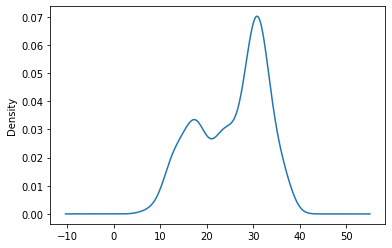

In [9]:
df["meantemp"].plot.kde()

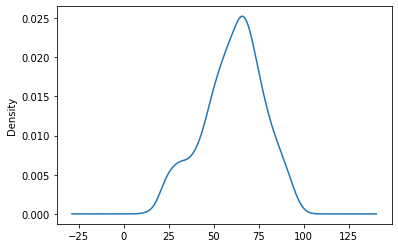

In [10]:
df["humidity"].plot.kde()

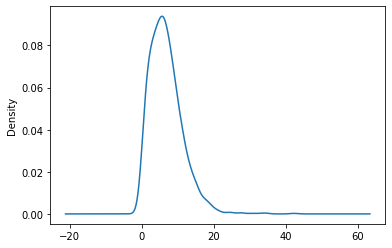

In [11]:
df["wind_speed"].plot.kde()

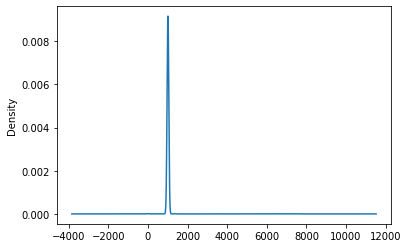

In [12]:
df["meanpressure"].plot.kde()

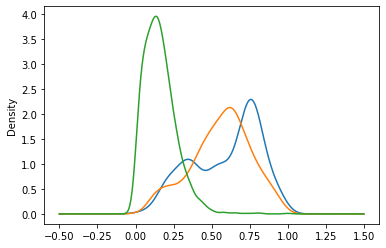

In [13]:
dfScaler["meantemp"].plot.kde()
dfScaler["humidity"].plot.kde()
dfScaler["wind_speed"].plot.kde()

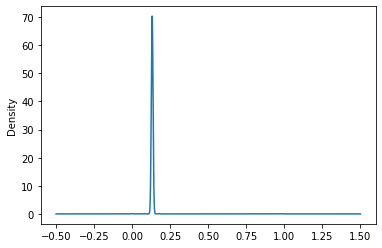

In [14]:
dfScaler["meanpressure"].plot.kde()

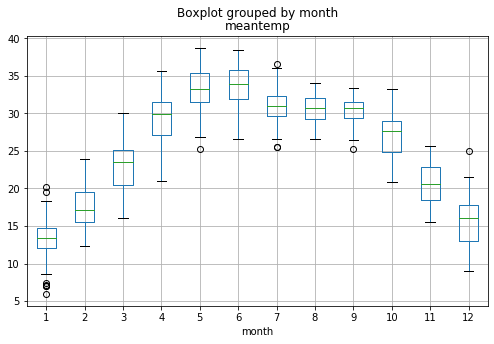

In [15]:
df.boxplot(column=['meantemp'], by= "month" ,figsize=(8,5))

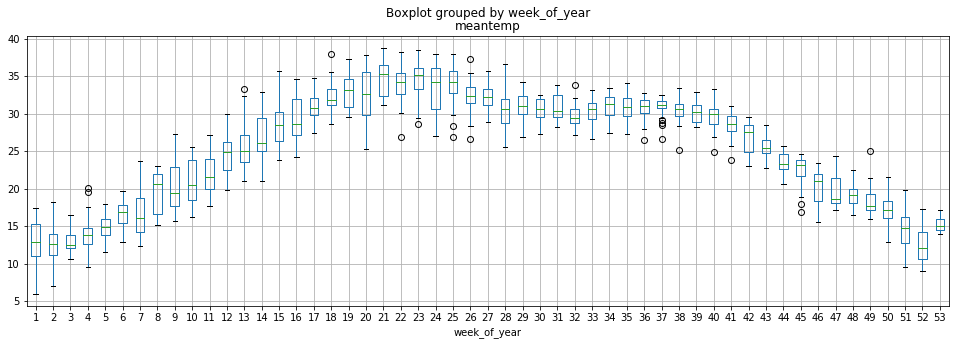

In [16]:
df.boxplot(column=['meantemp'], by= "week_of_year" ,figsize=(16,5))

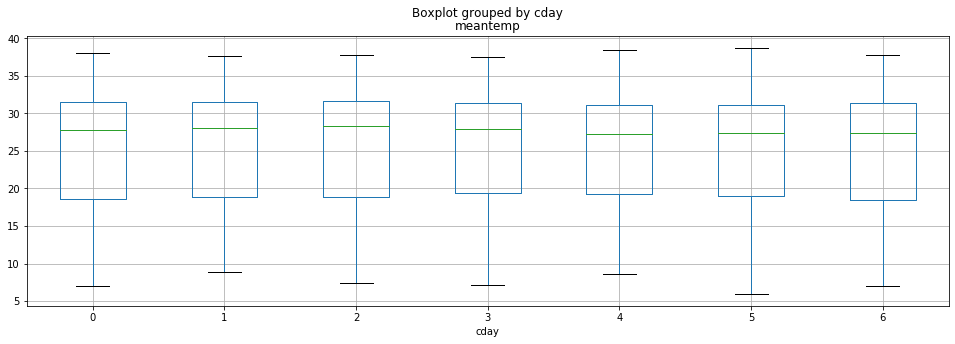

In [17]:
df.boxplot(column=['meantemp'], by= "cday" ,figsize=(16,5))

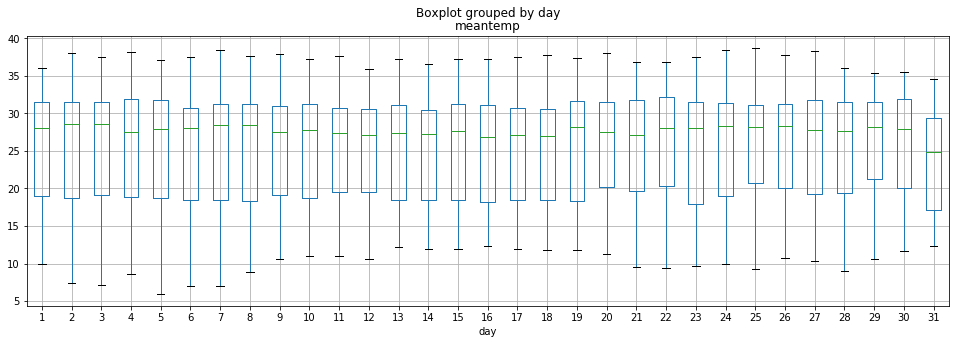

In [18]:
df.boxplot(column=['meantemp'], by= "day" ,figsize=(16,5))

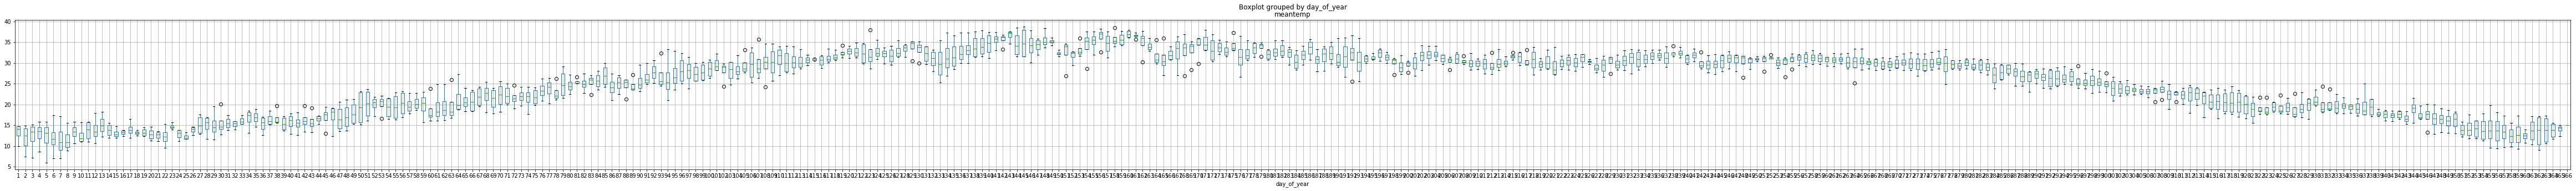

In [19]:
df.boxplot(column=['meantemp'], by= "day_of_year" ,figsize=(80,5))

**b)** Entrene un solo √Årbol de Regresi√≥n de m√∫ltiples niveles para resolver el problema. Defina un √Årbol **no regularizado** (como el que no tiene l√≠mites en su profundidad) y otro √Årbol **regularizado** (variando los hiper-par√°metros que prefiera, por ejemplo, los m√°s comunes como la profundidad, el n√∫mero m√≠nimo de datos para realizar *split* o el n√∫mero m√≠nimo de datos en cada hoja). Adem√°s comente sobre la ventaja de usar un √°rbol de decisi√≥n respecto a la escala de los datos ¬øPorqu√© no es necesario escalar los datos?

In [80]:
import numpy as np

from sklearn.tree import DecisionTreeRegressor as Tree

def RMSE(ytrue,ypred):
    return np.sqrt(np.mean(np.square(ytrue - ypred)) )

# Unregularized model -- default parameters
model_unr = Tree()
model_unr.fit(X_train,y_train)

# Regularized tree model
model_reg = Tree(splitter='best', max_depth=5, min_samples_split=5, max_leaf_nodes=14)
model_reg.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=5,
                      max_features=None, max_leaf_nodes=14,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=5,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

**c)** Para evaluar la calidad de predicci√≥n en este problema se utilizar√° la m√©trica Root Mean Squared Error (RMSE), indicando un error en la escala real de la temperatura. Como los datos de validaci√≥n siguen con el orden temporal, visualice esa predicci√≥n a lo largo del tiempo. Comente sobre los resultados comparando la regularizaci√≥n vs el no regularizar.

> **1) Unregularized**



RMSE train=  0.0
RMSE val=  2.7337486780701985


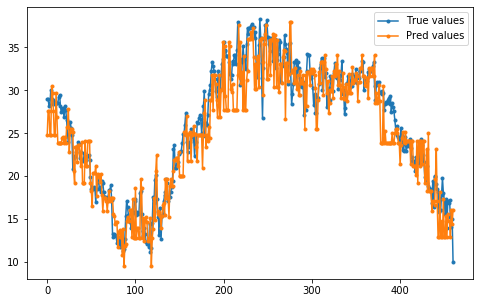

In [64]:
import matplotlib.pyplot as plt

y_train_hat = model_unr.predict(X_train)
y_val_hat = model_unr.predict(X_val)
print("RMSE train= ",RMSE(y_train,y_train_hat))
print("RMSE val= ",RMSE(y_val,y_val_hat))

plt.figure(figsize=(8,5))
plt.plot(y_val, '.-' ,label="True values")
plt.plot(y_val_hat, '.-' ,label="Pred values")
plt.legend()
plt.show()

**2) Regularized**

RMSE train=  1.6612681497646347
RMSE val=  1.6878041253762066


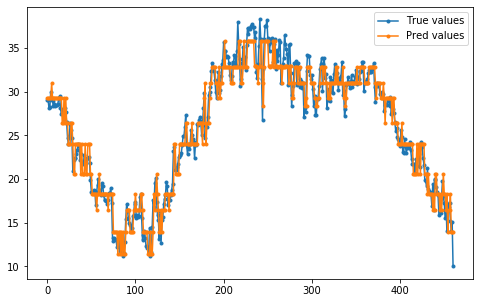

In [81]:
y_train_hat = model_reg.predict(X_train)
y_val_hat = model_reg.predict(X_val)
print("RMSE train= ",RMSE(y_train,y_train_hat))
print("RMSE val= ",RMSE(y_val,y_val_hat))

plt.figure(figsize=(8,5))
plt.plot(y_val, '.-' ,label="True values")
plt.plot(y_val_hat, '.-' ,label="Pred values")
plt.legend()
plt.show()

**d)** Entrene un ensamblado de √°rboles de m√∫ltiples niveles, mediante la t√©cnica de Bagging, compare el √Årbol no regularizado con el regularizado (seteando los hiper-par√°metros en base a lo experimentado anteriormente en b)) ¬øQu√© deber√≠a suceder? ¬øSe visualiza overfitting? Var√≠e la cantidad de √°rboles de decisi√≥n utilizados en el ensamblado (n estimators), realice un gr√°fico resumen del RMSE de entrenamiento y validaci√≥n en funci√≥n de este hiper-par√°metro.

**1) Unregularized**

In [0]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.ensemble import BaggingRegressor

RMSE_train_list = []
RMSE_test_list = []

for n_estimator in range(100):

  # to avoid n_estimator = 0
  n_estimator = n_estimator + 1

  model = BaggingRegressor(base_estimator=model_unr, n_estimators=n_estimator, n_jobs=-1)
  model.fit(X_train,y_train)

  y_train_hat = model.predict(X_train)
  y_val_hat = model.predict(X_val)
  RMSE_train_list.append(RMSE(y_train,y_train_hat))
  RMSE_test_list.append(RMSE(y_val,y_val_hat))

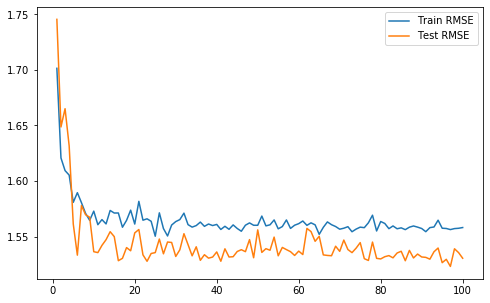

In [45]:
x_axis = np.arange(101)[1:]
plt.figure(figsize=(8,5))
plt.plot(x_axis, RMSE_train_list,label="Train RMSE")
plt.plot(x_axis, RMSE_test_list,label="Test RMSE")
plt.legend()
plt.show()

**2) Regularized**

In [0]:
RMSE_train_list = []
RMSE_test_list = []

for n_estimator in range(100):

  # to avoid n_estimator = 0
  n_estimator = n_estimator + 1

  model = BaggingRegressor(base_estimator=model_reg, n_estimators=n_estimator, n_jobs=-1)
  model.fit(X_train,y_train)

  y_train_hat = model.predict(X_train)
  y_val_hat = model.predict(X_val)
  RMSE_train_list.append(RMSE(y_train,y_train_hat))
  RMSE_test_list.append(RMSE(y_val,y_val_hat))

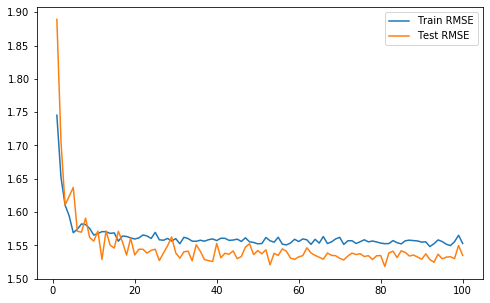

In [83]:
x_axis = np.arange(101)[1:]
plt.figure(figsize=(8,5))
plt.plot(x_axis, RMSE_train_list,label="Train RMSE")
plt.plot(x_axis, RMSE_test_list,label="Test RMSE")
plt.legend()
plt.show()

**e)** Entrene un ensamblado de √°rboles de m√∫ltiples niveles, mediante la t√©cnica de AdaBoost, compare el √Årbol no regularizado con el regularizado (seteando los hiper-par√°metros en base a lo experimentado anteriormente en d) ¬øSe visualiza overfitting? ¬øQu√© t√©cnica utiliza la librer√≠a de sklearn, re-muestrear o pesar ejemplos? ¬øQu√© le parece m√°s sensato?. Var√≠e la cantidad de √°rboles de decisi√≥n utilizados en el ensamblado (n estimators), realice un gr√°fico resumen del RMSE de entrenamiento y validaci√≥n en funci√≥n de este hiper-par√°metro. Compare y analice con la t√©cnica utilizada en d).

**1) Unregularized**

In [0]:
from sklearn.ensemble import AdaBoostRegressor

RMSE_train_list = []
RMSE_test_list = []

for n_estimator in range(100):

  # to avoid n_estimator = 0
  n_estimator = n_estimator + 1

  model = AdaBoostRegressor(base_estimator=model_unr, n_estimators=n_estimator)
  model.fit(X_train,y_train)

  y_train_hat = model.predict(X_train)
  y_val_hat = model.predict(X_val)
  RMSE_train_list.append(RMSE(y_train,y_train_hat))
  RMSE_test_list.append(RMSE(y_val,y_val_hat))

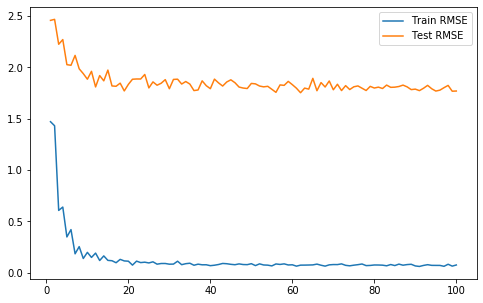

In [85]:
x_axis = np.arange(101)[1:]
plt.figure(figsize=(8,5))
plt.plot(x_axis, RMSE_train_list,label="Train RMSE")
plt.plot(x_axis, RMSE_test_list,label="Test RMSE")
plt.legend()
plt.show()

**2) Regularized**

In [0]:
RMSE_train_list = []
RMSE_test_list = []

for n_estimator in range(100):

  # to avoid n_estimator = 0
  n_estimator = n_estimator + 1

  model = AdaBoostRegressor(base_estimator=model_unr, n_estimators=n_estimator)
  model.fit(X_train,y_train)

  y_train_hat = model.predict(X_train)
  y_val_hat = model.predict(X_val)
  RMSE_train_list.append(RMSE(y_train,y_train_hat))
  RMSE_test_list.append(RMSE(y_val,y_val_hat))

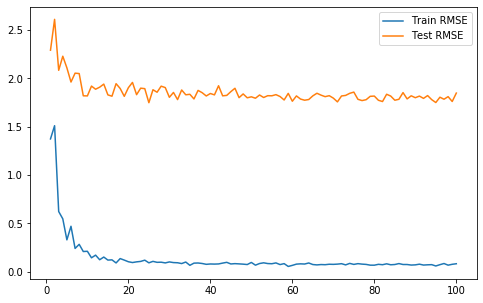

In [87]:
x_axis = np.arange(101)[1:]
plt.figure(figsize=(8,5))
plt.plot(x_axis, RMSE_train_list,label="Train RMSE")
plt.plot(x_axis, RMSE_test_list,label="Test RMSE")
plt.legend()
plt.show()

**f)** Pruebe otra t√©cnica de ensamblado dedicada a √°rboles de decisi√≥n, que combina el muestreo boostrap de Bagging con muestreo sobre las features: Random Forest, compare el √Årbol no regularizado con el regularizado ¬øSe visualiza overfitting?. Var√≠e la cantidad de √°rboles de decisi√≥n utilizados en el ensamblado (n estimators), realice un gr√°fico resumen del RMSE de entrenamiento y validaci√≥n en funci√≥n de este hiper-par√°metro.

**1) Unregularized**

In [0]:
from sklearn.ensemble import RandomForestRegressor

RMSE_train_list = []
RMSE_test_list = []

for n_estimator in range(100):

  # to avoid n_estimator = 0
  n_estimator = n_estimator + 1

  model_unr = RandomForestRegressor(n_estimators=n_estimator, n_jobs=-1)
  model_unr.fit(X_train,y_train)

  y_train_hat = model_unr.predict(X_train)
  y_val_hat = model_unr.predict(X_val)
  RMSE_train_list.append(RMSE(y_train,y_train_hat))
  RMSE_test_list.append(RMSE(y_val,y_val_hat))

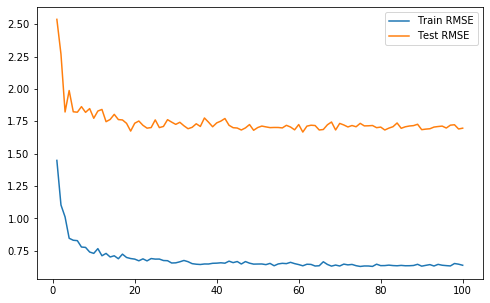

In [89]:
x_axis = np.arange(101)[1:]
plt.figure(figsize=(8,5))
plt.plot(x_axis, RMSE_train_list,label="Train RMSE")
plt.plot(x_axis, RMSE_test_list,label="Test RMSE")
plt.legend()
plt.show()

**2) Regularized**

In [0]:
RMSE_train_list = []
RMSE_test_list = []

for n_estimator in range(100):

  # to avoid n_estimator = 0
  n_estimator = n_estimator + 1

  model_reg = RandomForestRegressor(n_estimators=n_estimator, n_jobs=-1, max_depth=5, min_samples_split=5, max_leaf_nodes=14)
  model_reg.fit(X_train,y_train)

  y_train_hat = model_reg.predict(X_train)
  y_val_hat = model_reg.predict(X_val)
  RMSE_train_list.append(RMSE(y_train,y_train_hat))
  RMSE_test_list.append(RMSE(y_val,y_val_hat))


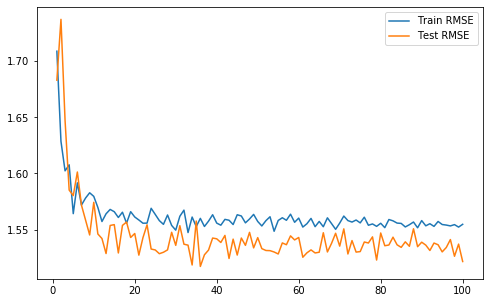

In [92]:
x_axis = np.arange(101)[1:]
plt.figure(figsize=(8,5))
plt.plot(x_axis, RMSE_train_list,label="Train RMSE")
plt.plot(x_axis, RMSE_test_list,label="Test RMSE")
plt.legend()
plt.show()

**g)** Verifique que el OOB error (out of bag error) de los ensambladores que utilizan la t√©cnica boostrap puede ser una alternativa como m√©trica de generalizaci√≥n, compare con el error calculado sobre el conjunto de validaci√≥n (o en su defecto cross validation).

**1) Unregularized**

In [0]:
# Unregularized model -- default parameters
model_unr = Tree()
model_unr.fit(X_train,y_train)

oob_error_train_list = []
val_error_list = []
no_estimators = np.arange(20, 50)
for n_estimator in no_estimators:

  n_estimator = n_estimator

  model = BaggingRegressor(base_estimator=model_unr, n_estimators=n_estimator, n_jobs=-1, oob_score=True)
  model.fit(X_train,y_train)

  y_train_hat = model.predict(X_train)
  y_val_hat = model.predict(X_val)
  oob_error_train_list.append(model.oob_score_)
  val_error_list.append(model.score(X_val,y_val))

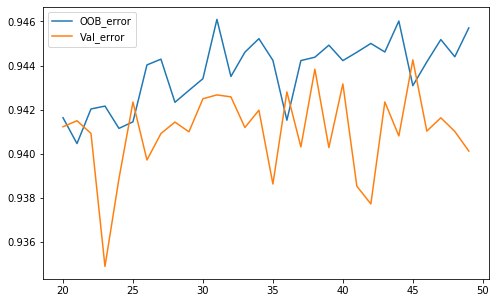

In [110]:
x_axis = np.arange(101)[1:]
plt.figure(figsize=(8,5))
plt.plot(no_estimators, oob_error_train_list,label="OOB_error")
plt.plot(no_estimators, val_error_list,label="Val_error")
plt.legend()
plt.show()

In [0]:
# Regularized tree model
model_reg = Tree(splitter='best', max_depth=5, min_samples_split=5, max_leaf_nodes=14)
model_reg.fit(X_train,y_train)

oob_error_train_list = []
val_error_list = []
no_estimators = np.arange(20, 50)
for n_estimator in no_estimators:

  n_estimator = n_estimator

  model = BaggingRegressor(base_estimator=model_reg, n_estimators=n_estimator, n_jobs=-1, oob_score=True)
  model.fit(X_train,y_train)

  y_train_hat = model.predict(X_train)
  y_val_hat = model.predict(X_val)
  oob_error_train_list.append(model.oob_score_)
  val_error_list.append(model.score(X_val,y_val))

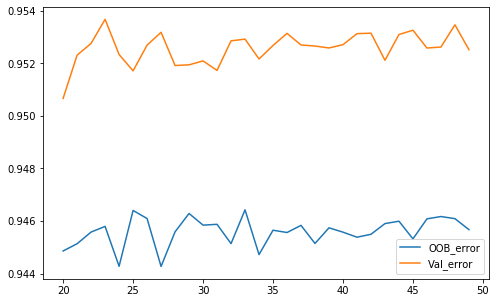

In [112]:
x_axis = np.arange(101)[1:]
plt.figure(figsize=(8,5))
plt.plot(no_estimators, oob_error_train_list,label="OOB_error")
plt.plot(no_estimators, val_error_list,label="Val_error")
plt.legend()
plt.show()

**h)** Defina otra forma de combinar los valores que entregan los ensamblados al hacer predicciones y compare con lo que se hace actualmente, por ejemplo Bagging realiza el voto de la mayor√≠a para clasificaci√≥n y promedio para regresi√≥n, AdaBoost realiza una combinaci√≥n ponderada de cada clasificador dependiendo de su habilidad (desempe√±o para clasificar el conjunto de entrenamiento). Se puede inspirar desde cl√°sicos estad√≠sticos, como entregar el primer cuart√≠l ( ùëÑ1 ) si al ensamblado le cuesta predecir valores bajos, o el segundo cuartil ( ùëÑ2 ) o mediana para ser robusto a predicciones at√≠picas de modelos.

In [0]:
def combine_predictions(predictions):
    return #define !
list_estimators = model.estimators_
list_predictions = [estimator.predict(X_val) for estimator in list_estimators]
new_predictions = combine_predictions(list_predictions)
print("RMSE val= ",RMSE(y_val, new_predictions))

<a id="refs"></a>
## Referencias
[1] https://scikit-learn.org/stable/modules/ensemble.html  
[2] https://scikit-learn.org/stable/modules/tree.html  
[3] http://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html  
[4] https://towardsdatascience.com/methods-for-dealing-with-imbalanced-data-5b761be45a18